In [1]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    return np.array(y_noise)


def get_draw_data(nodes, mu, std):
    x = np.arange(0.0, 1.0, 1 / nodes)
    y = np.array([math.sin(x_ ** 2 + 1) for x_ in x])
    y_noise = normal(y, mu, std)
    # params = [(0, 1), (0, 2), (3, 1)]
    # 创建一个图像和轴
    fig, ax = plt.subplots()
    # 绘制两条线，并添加图例
    line1, = ax.plot(x, y, color='red', label='origin: y = x^2+1')
    # 添加图例
    ax.legend()
    # 设置图像标题和坐标轴标签
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()
    return x, y, y_noise

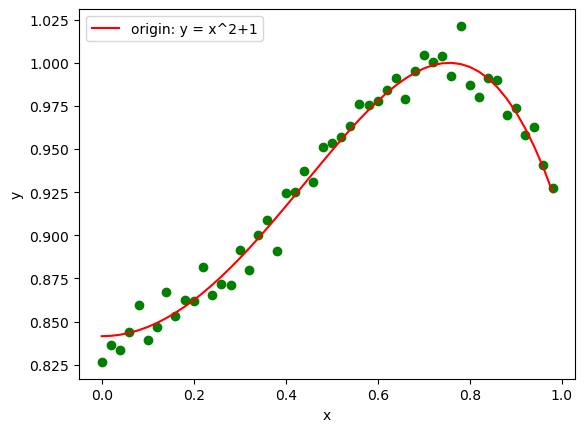

In [3]:
nodes = 50
mu = 0
std = 0.01
x, y_origin, y_noise = get_draw_data(nodes, mu, std)

In [4]:
def map_w(m, alpha, x, Y, std):
    X = np.array([[x_ ** i for i in range(m)] for x_ in x])
    w_ = np.linalg.inv((X.T @ X + alpha * std * np.identity(m))) @ X.T @ Y.T
    return w_, X


def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [5]:
m = 10
alpha = 0.5
w_, X = map_w(m, alpha, x, y_noise, std)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.0018026538844118738


In [6]:
def display(m, alpha, x, y_, y_origin, y_noise):
    fig, ax = plt.subplots()
    # 绘制两条线，并添加图例
    line1, = ax.plot(x, y_origin, color='red', label='origin: y = x^2+1')
    line2, = ax.plot(x, y_, color='blue', label=f'polynomial: m={m}, alpha={alpha}')
    # 添加图例
    ax.legend()
    # 设置图像标题和坐标轴标签
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


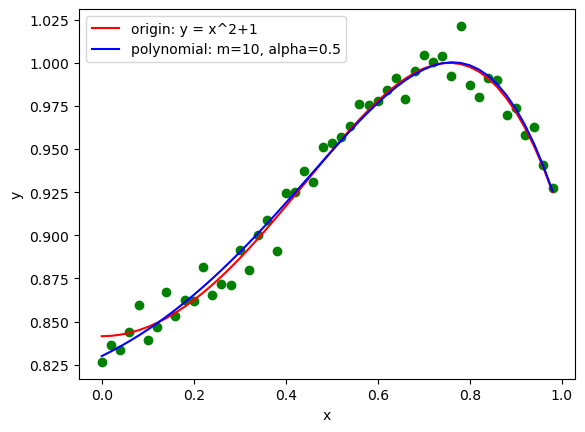

In [7]:
display(m, alpha, x, y_, y_origin, y_noise)

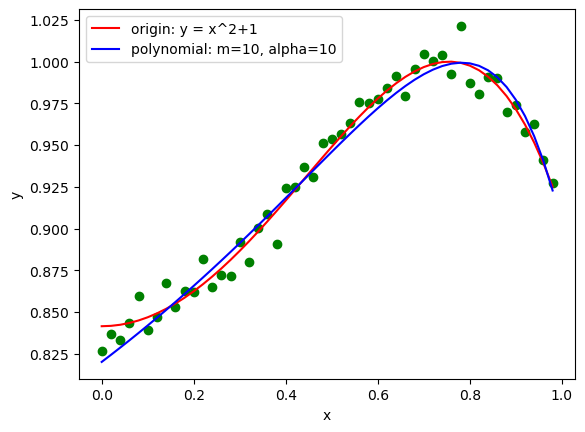

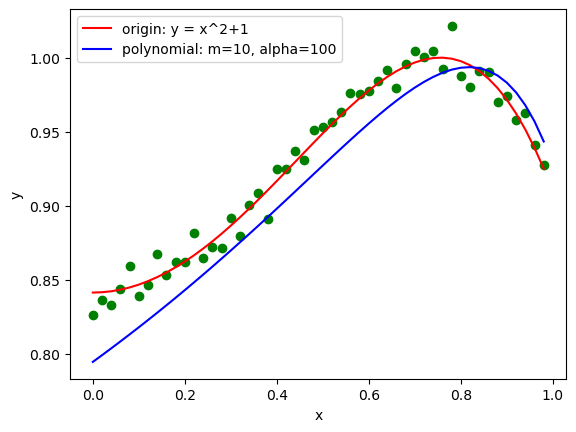

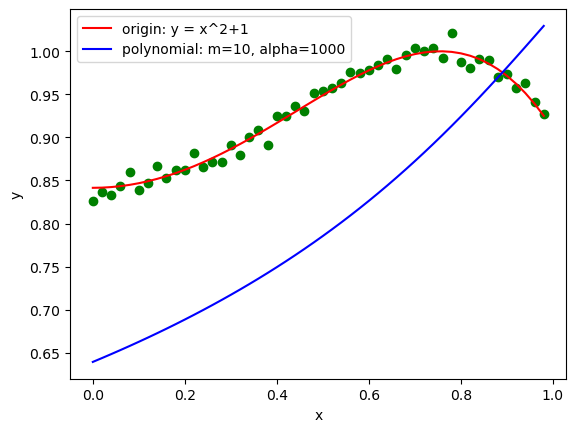

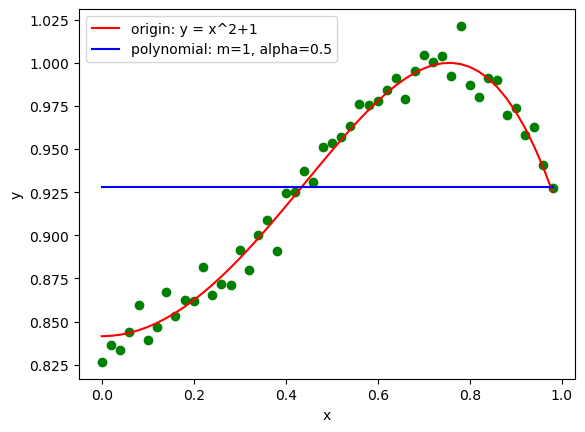

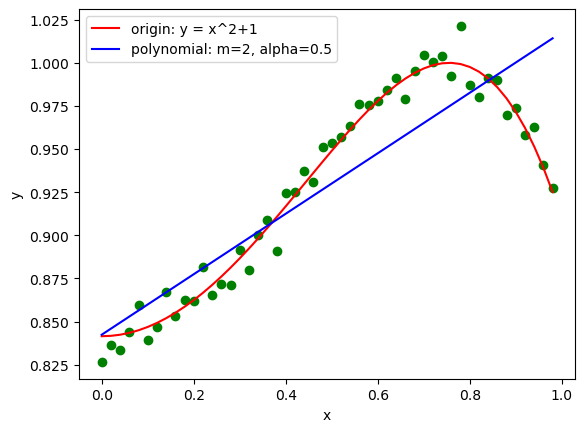

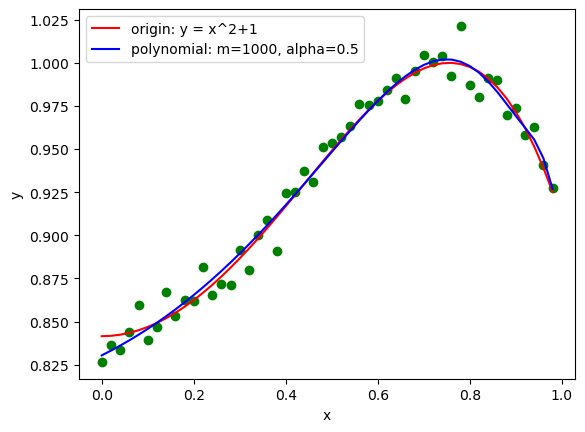

In [9]:
params = [(10, 10), (10, 100), (10, 1000), (1, 0.5), (2, 0.5), (1000, 0.5)]
for m, alpha in params:
    w_, X = map_w(m, alpha, x, y_noise, std)
    y_ = X @ w_
    display(m, alpha, x, y_, y_origin, y_noise)